Feed Forward Neural Network

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Independent Variable

In [4]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X.shape

(768, 8)

Dependent Variable

In [5]:
y = df[['Outcome']]
y.shape

(768, 1)

Train - Test Data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [23]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [24]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [25]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [26]:
# from os import name
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu', name='input'))
model.add(Dense(8, activation='relu', name='layer1'))
model.add(Dense(1, activation='relu', name='layer2'))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 12)                108       
_________________________________________________________________
layer1 (Dense)               (None, 8)                 104       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


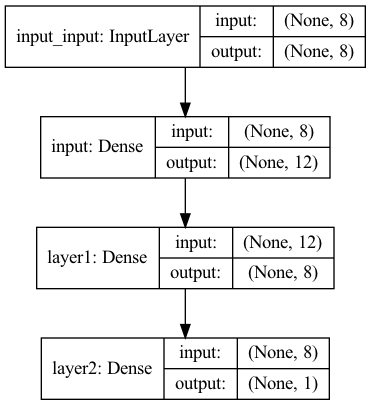

In [28]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# fit the keras model on the dataset
model.fit(X, y, epochs=15, batch_size=50)

Epoch 1/15
768/768 [==============================] - 1s 727us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 2/15
768/768 [==============================] - 0s 93us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 3/15
768/768 [==============================] - 0s 114us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 4/15
768/768 [==============================] - 0s 61us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 5/15
768/768 [==============================] - 0s 73us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 6/15
768/768 [==============================] - 0s 57us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 7/15
768/768 [==============================] - 0s 42us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 8/15
768/768 [==============================] - 0s 32us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 9/15
768/768 [==============================] - 0s 39us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 10/15
768/768 [==============================] - 0s 46us/step - loss: 5.3827 - accu

In [31]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
print(_)

768/768 [==============================] - 0s 128us/step
Accuracy: 65.10
5.382664352655411
